In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/Users/nithesh-pt7363/Work/IITMBS/TDS/Project-1/assembly_dataset2_corrected - assembly_dataset2.csv.csv")
df = df[(df['ST_NAME'] == 'Bihar') & (df['AC_NAME'] == 'AMARPUR')]
df.head()

,ST_NAME,YEAR,AC_NO,#,AC_NAME,AC_TYPE,NAME,SEX,AGE,CATEGORY,PARTY,VOTES
1416,Bihar,1957,138,1,AMARPUR,GEN,SHITAL PD. BHAGAT,M,NaN,NODATA,INC,11781.0
1417,Bihar,1957,138,2,AMARPUR,GEN,NITYA PD. SINGH,M,NaN,NODATA,IND,3780.0
1418,Bihar,1957,138,3,AMARPUR,GEN,RAGHUNANDAN CHOUDHRY,M,NaN,NODATA,IND,3547.0
1419,Bihar,1957,138,4,AMARPUR,GEN,GUNESHAR SINGH,M,NaN,NODATA,IND,2119.0
1420,Bihar,1957,138,5,AMARPUR,GEN,SAHDEO PD. SINGH,M,NaN,NODATA,PSP,1393.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38160 entries, 0 to 38159
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ST_NAME   38160 non-null  object 
 1   YEAR      38160 non-null  int64  
 2   AC_NO     38160 non-null  int64  
 3   #         38160 non-null  int64  
 4   AC_NAME   38160 non-null  object 
 5   AC_TYPE   38160 non-null  object 
 6   NAME      38160 non-null  object 
 7   SEX       38121 non-null  object 
 8   AGE       8619 non-null   float64
 9   CATEGORY  38160 non-null  object 
 10  PARTY     38160 non-null  object 
 11  VOTES     38159 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 3.5+ MB


In [5]:
df.describe()

,YEAR,AC_NO,#,AGE,VOTES
count,38160.000000,38160.000000,38160.000000,8619.000000,38159.000000
mean,1988.891431,139.254403,8.638286,42.372665,6750.967819
std,15.221625,86.756899,7.597531,10.965774,11650.663432
min,1951.000000,1.000000,1.000000,25.000000,1.000000
25%,1980.000000,59.000000,3.000000,34.000000,365.000000
50%,1990.000000,138.000000,6.000000,41.000000,1378.000000
75%,2000.000000,213.000000,12.000000,50.000000,7412.500000
max,2013.000000,323.000000,87.000000,89.000000,123750.000000


In [6]:
df['VOTES'].max() - df['VOTES'].min()

123749.0

In [7]:
party_counts = df.groupby(['AC_NAME', 'PARTY']).size().reset_index(name='count')

# Finding the party with the maximum count in each constituency
max_party_indices = party_counts.groupby('AC_NAME')['count'].idxmax()

# Getting the corresponding party for each constituency
winning_parties = party_counts.loc[max_party_indices]

# Sorting the DataFrame alphabetically by party name
winning_parties_sorted = winning_parties.sort_values(by='PARTY')

# Displaying the results
print(winning_parties_sorted[['AC_NAME', 'PARTY']])

         AC_NAME PARTY
6386    NAYAGRAM   BJS
4930   KUNNATHUR   DMK
7222    RAJNAGAR   INC
4128      JHALDA   INC
15        ADAPUR   IND
...          ...   ...
3272  GOBINDGANJ   IND
3306       GODDA   IND
3345         GOH   IND
3414    GOPALPUR   IND
8982     ZIRADEI   IND

[261 rows x 2 columns]


In [11]:
party_counts = df['PARTY'].value_counts()

# Sort the parties alphabetically
sorted_parties = party_counts.sort_index()

# Get the party with the highest count
winning_party = sorted_parties.idxmax()

print(f"The party that won the highest number of elections in Bihar during 1951 was: {winning_party}")

The party that won the highest number of elections in Bihar during 1951 was: IND


In [22]:
# Assuming your DataFrame is named 'df'

# Sort the DataFrame by 'YEAR' and 'AC_NAME' to ensure consecutive elections are grouped together
df_sorted = df.sort_values(by=['YEAR', 'AC_NAME'])

# Calculate vote shares for each party in each election
df_sorted['VOTE_SHARE'] = df_sorted.groupby(['YEAR', 'AC_NAME', 'PARTY'])['VOTES'].transform(lambda x: x / x.sum())

# Group the data by 'PARTY' and calculate the difference in vote share between consecutive elections
df_sorted['VOTE_SHARE_DIFF'] = df_sorted.groupby('PARTY')['VOTE_SHARE'].diff()

# Find the party with the maximum improvement
max_improvement_party = df_sorted.loc[df_sorted['VOTE_SHARE_DIFF'].idxmax()]

# Get the increase in vote share
increase_in_vote_share = max_improvement_party['VOTE_SHARE_DIFF'] * 100  # Convert to percentage

# Display the result
print("Increase in vote share for the party with the most significant improvement:", increase_in_vote_share, "%")

Increase in vote share for the party with the most significant improvement: 99.91625141325741 %


In [13]:
# Assuming your DataFrame is named 'df'

# Calculate margin percentage for each candidate in each election
df['MARGIN_PERCENTAGE'] = (df.groupby(['YEAR', 'AC_NAME'])['VOTES'].transform(max) - df['VOTES']) / df.groupby(['YEAR', 'AC_NAME'])['VOTES'].transform(max) * 100

# Find the row with the highest margin percentage
max_margin_row = df.loc[df['MARGIN_PERCENTAGE'].idxmax()]

# Get the year with the highest margin percentage
year_highest_margin = max_margin_row['YEAR']

# Display the result
print("Year with the highest margin percentage:", year_highest_margin)


Year with the highest margin percentage: 1990


/var/folders/_6/tlx3n2s10kg748mn6t_08mjw0000gp/T/ipykernel_19098/285920826.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['MARGIN_PERCENTAGE'] = (df.groupby(['YEAR', 'AC_NAME'])['VOTES'].transform(max) - df['VOTES']) / df.groupby(['YEAR', 'AC_NAME'])['VOTES'].transform(max) * 100
/var/folders/_6/tlx3n2s10kg748mn6t_08mjw0000gp/T/ipykernel_19098/285920826.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['MARGIN_PERCENTAGE'] = (df.groupby(['YEAR', 'AC_NAME'])['VOTES'].transform(max) - df['VOTES']) / df.groupby(['YEAR', 'AC_NAME'])['VOTES'].transform(max) * 100


In [14]:
# Assuming your DataFrame is named 'df'

# Sort the DataFrame by 'YEAR' and 'PARTY' to ensure consecutive elections are grouped together
df_sorted = df.sort_values(by=['YEAR', 'PARTY'])

# Calculate vote shares for each party in each election
df_sorted['VOTE_SHARE'] = df_sorted.groupby(['YEAR', 'PARTY'])['VOTES'].transform(lambda x: x / x.sum())

# Group the data by 'PARTY' and calculate the difference in vote share between consecutive elections
df_sorted['VOTE_SHARE_DIFF'] = df_sorted.groupby('PARTY')['VOTE_SHARE'].diff()

# Find the party with the maximum increase in vote share
max_increase_party = df_sorted.loc[df_sorted['VOTE_SHARE_DIFF'].idxmax()]

# Get the year with the most significant increase
year_max_increase = max_increase_party['YEAR']

# Display the result
print("Year with the most significant increase in vote share for a party:", year_max_increase)

Year with the most significant increase in vote share for a party: 1998


In [15]:
# Assuming your DataFrame is named 'df'

# Filter the DataFrame to include only female candidates
female_candidates = df[df['SEX'] == 'F']

# Group the data by 'YEAR' and count the number of female candidates in each election year
female_candidates_per_year = female_candidates.groupby('YEAR').size()

# If there are no female candidates in any election year, return 0
if female_candidates_per_year.empty:
    highest_female_candidates = 0
else:
    # Find the highest number of female candidates participating in an election year
    highest_female_candidates = female_candidates_per_year.max()

# Display the result
print("Highest number of female candidates participating in an election year:", highest_female_candidates)

Highest number of female candidates participating in an election year: 235


In [16]:
winners = df[df['#'] == 1]

# Count the number of wins for each party
party_wins = winners['PARTY'].value_counts()

# Find the party with the most wins
most_wins_party = party_wins.idxmax()

print(f"The party that won the most elections is: {most_wins_party}")

The party that won the most elections is: INC


In [17]:
# Calculate the change in votes for each party from one election to the next
df['VOTES_CHANGE'] = df.groupby('PARTY')['VOTES'].diff()

# Find the party that had the most significant increase in votes
max_increase_party = df.loc[df['VOTES_CHANGE'].idxmax()]['PARTY']
max_increase_value = df['VOTES_CHANGE'].max()

print(f"The party that showed the most significant increase in votes is: {max_increase_party}")
print(f"The increase in votes was: {max_increase_value}")


The party that showed the most significant increase in votes is: IND
The increase in votes was: 102398.0


In [18]:
# Sort the dataframe by YEAR and AC_NO (constituency number), then by VOTES in descending order
df_sorted = df.sort_values(by=['YEAR', 'AC_NO', 'VOTES'], ascending=[True, True, False])

# Group by YEAR and AC_NO, and calculate the difference in votes between the first and second candidate
df_sorted['MARGIN'] = df_sorted.groupby(['YEAR', 'AC_NO'])['VOTES'].diff(periods=-1)

# Find the year with the highest margin
highest_margin_year = df_sorted.loc[df_sorted['MARGIN'].idxmax()]['YEAR']

print(f"The year with the highest margin of victory is: {highest_margin_year}")


The year with the highest margin of victory is: 1990


In [19]:
# Calculate the change in votes for each party from one election to the next
df['VOTES_CHANGE'] = df.groupby(['PARTY', 'YEAR'])['VOTES'].diff()

# Find the year with the most significant increase in votes
max_increase_year = df.loc[df['VOTES_CHANGE'].idxmax()]['YEAR']

print(f"The year with the most significant increase in votes is: {max_increase_year}")

The year with the most significant increase in votes is: 2000


In [73]:
# Filter the dataframe for female candidates
df_female = df[df['SEX'] == 'F']

# Count the number of female candidates in each election year
female_counts = df_female['YEAR'].value_counts()

# Find the year with the highest number of female candidates
max_female_year = female_counts.idxmax()
max_female_count = female_counts.max()

print(f"The year with the highest number of female candidates is: {max_female_year}")
print(f"The number of female candidates in that year is: {max_female_count}")


The year with the highest number of female candidates is: 1995
The number of female candidates in that year is: 3


In [21]:
# Calculate the margin of votes for each election
df['MARGIN'] = df.groupby(['YEAR', 'AC_NO'])['VOTES'].transform(lambda x: x.iloc[0] - x.iloc[1])

# Calculate the total votes for each election
total_votes = df.groupby(['YEAR', 'AC_NO'])['VOTES'].transform('sum')

# Calculate the margin percentage
df['MARGIN_PERCENTAGE'] = (df['MARGIN'] / total_votes) * 100

# Find the highest margin percentage
highest_margin_percentage = df['MARGIN_PERCENTAGE'].max()

print(f"The highest margin percentage a winning candidate has beaten the runner-up is: {highest_margin_percentage:.2f}%")


IndexError: single positional indexer is out-of-bounds

In [23]:
# Grouping the data by 'AC_NAME' and 'PARTY' and counting occurrences
party_counts = df.groupby(['AC_NAME', 'PARTY']).size().reset_index(name='count')

# Finding the party with the maximum count in each constituency
max_party_indices = party_counts.groupby('AC_NAME')['count'].idxmax()

# Getting the corresponding party for each constituency
winning_parties = party_counts.loc[max_party_indices]

# Sorting the DataFrame alphabetically by party name
winning_parties_sorted = winning_parties.sort_values(by='PARTY')

# Displaying the results
print(winning_parties_sorted[['AC_NAME', 'PARTY']])


         AC_NAME PARTY
6386    NAYAGRAM   BJS
4930   KUNNATHUR   DMK
7222    RAJNAGAR   INC
4128      JHALDA   INC
15        ADAPUR   IND
...          ...   ...
3272  GOBINDGANJ   IND
3306       GODDA   IND
3345         GOH   IND
3414    GOPALPUR   IND
8982     ZIRADEI   IND

[261 rows x 2 columns]


In [24]:
# Calculate margin percentage for each candidate in each election
df['MARGIN_PERCENTAGE'] = (df.groupby(['YEAR', 'AC_NAME'])['VOTES'].transform(max) - df['VOTES']) / df.groupby(['YEAR', 'AC_NAME'])['VOTES'].transform(max) * 100

# Find the row with the highest margin percentage
max_margin_row = df.loc[df['MARGIN_PERCENTAGE'].idxmax()]

# Get the year with the highest margin percentage
year_highest_margin = max_margin_row['YEAR']

# Display the result
print("Year with the highest margin percentage:", year_highest_margin)

Year with the highest margin percentage: 1990


/var/folders/_6/tlx3n2s10kg748mn6t_08mjw0000gp/T/ipykernel_19098/3843092481.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['MARGIN_PERCENTAGE'] = (df.groupby(['YEAR', 'AC_NAME'])['VOTES'].transform(max) - df['VOTES']) / df.groupby(['YEAR', 'AC_NAME'])['VOTES'].transform(max) * 100
/var/folders/_6/tlx3n2s10kg748mn6t_08mjw0000gp/T/ipykernel_19098/3843092481.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['MARGIN_PERCENTAGE'] = (df.groupby(['YEAR', 'AC_NAME'])['VOTES'].transform(max) - df['VOTES']) / df.groupby(['YEAR', 'AC_NAME'])['VOTES'].transform(max) * 100


In [26]:
amarpur_data = df[(df['ST_NAME'] == 'Bihar') & (df['AC_NAME'] == 'AMARPUR')]

# Calculate vote share for each candidate
total_votes = amarpur_data['VOTES'].sum()
amarpur_data['VOTE_SHARE'] = amarpur_data['VOTES'] / total_votes

# Find candidates with highest and lowest vote shares
top_candidate = amarpur_data.loc[amarpur_data['VOTE_SHARE'].idxmax()]
bottom_candidate = amarpur_data.loc[amarpur_data['VOTE_SHARE'].idxmin()]

# Calculate vote margin
vote_margin = (top_candidate['VOTE_SHARE'] - bottom_candidate['VOTE_SHARE']) * total_votes

# Print the largest vote margin
print("The largest vote margin between the top and bottom candidates in the AMARPUR constituency is:", int(vote_margin))

The largest vote margin between the top and bottom candidates in the AMARPUR constituency is: 58861


/var/folders/_6/tlx3n2s10kg748mn6t_08mjw0000gp/T/ipykernel_19098/1573027260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amarpur_data['VOTE_SHARE'] = amarpur_data['VOTES'] / total_votes


In [62]:
df = df[(df['ST_NAME'] == 'Bihar') & (df['AC_NAME'] == 'AMARPUR')]

# Sort the dataframe by votes in descending order
amarpur_df_sorted = df.sort_values(by='VOTES', ascending=False)

# Calculate the vote margin between the top and bottom candidates
largest_margin = amarpur_df_sorted['VOTES'].iloc[0] - amarpur_df_sorted['VOTES'].iloc[-1]

# Print the result
print("The largest vote margin between the top and bottom candidates in the AMARPUR constituency of Bihar is:", largest_margin)

The largest vote margin between the top and bottom candidates in the AMARPUR constituency of Bihar is: 58861.0


In [63]:
amarpur_df = df[(df['ST_NAME'] == 'Bihar') & (df['AC_NAME'] == 'AMARPUR')]

# Count the occurrences of each party
party_counts = amarpur_df['PARTY'].value_counts()

# Find the party with the highest count
winning_party = party_counts.idxmax()

# If there are multiple parties with the same highest count, choose the first party alphabetically
if (party_counts == party_counts.max()).sum() > 1:
    winning_party = party_counts[party_counts == party_counts.max()].index.min()

# Print the result
print("The party that won the highest number of elections in the AMARPUR constituency of Bihar is:", winning_party)


The party that won the highest number of elections in the AMARPUR constituency of Bihar is: IND


In [64]:
amarpur_df = df[(df['ST_NAME'] == 'Bihar') & (df['AC_NAME'] == 'AMARPUR')]

# Sort the dataset by "YEAR"
amarpur_df_sorted = amarpur_df.sort_values(by='YEAR')

# Group the data by "PARTY" and "YEAR" to calculate vote share for each party in each election
party_year_grouped = amarpur_df_sorted.groupby(['PARTY', 'YEAR']).sum()['VOTES'].reset_index()

# Calculate the difference in vote share for each party between consecutive elections
party_year_grouped['VOTE_SHARE_DIFF'] = party_year_grouped.groupby('PARTY')['VOTES'].diff()

# Find the party with the maximum improvement
most_improved_party = party_year_grouped.loc[party_year_grouped['VOTE_SHARE_DIFF'].idxmax()]

# Calculate the increase in vote share for that party
increase_in_vote_share = most_improved_party['VOTE_SHARE_DIFF']

# Print the result
print("The increase in vote share for the party that showed the most significant improvement from one election to the next consecutive one in the AMARPUR constituency of Bihar is:", increase_in_vote_share)

The increase in vote share for the party that showed the most significant improvement from one election to the next consecutive one in the AMARPUR constituency of Bihar is: 33965.0


In [66]:
party_year_grouped = df.groupby(['PARTY', 'YEAR']).sum()['VOTES'].reset_index()

# Calculate the total votes cast in each election year
total_votes_per_year = df.groupby('YEAR')['VOTES'].sum()

# Calculate the vote share for each party in each election year
party_year_grouped['VOTE_SHARE'] = party_year_grouped.apply(lambda row: row['VOTES'] / total_votes_per_year[row['YEAR']], axis=1)

# Calculate the difference in vote share for each party between consecutive elections
party_year_grouped['VOTE_SHARE_DIFF'] = party_year_grouped.groupby('PARTY')['VOTE_SHARE'].diff()

# Find the party with the maximum improvement
most_improved_party = party_year_grouped.loc[party_year_grouped['VOTE_SHARE_DIFF'].idxmax()]

# Calculate the increase in vote share for that party
increase_in_vote_share = most_improved_party['VOTE_SHARE_DIFF']

# Print the result
print("The increase in vote share for the party that showed the most significant improvement from one election to the next consecutive one across all constituencies is:", increase_in_vote_share)

The increase in vote share for the party that showed the most significant improvement from one election to the next consecutive one across all constituencies is: 0.3282282212687395


In [68]:
df = df[(df['ST_NAME'] == 'Bihar') & (df['AC_NAME'] == 'AMARPUR')]

# Group the data by year
year_grouped = df.groupby('YEAR')

# Initialize variables to store the maximum margin percentage and the corresponding year
max_margin_percentage = 0
year_with_highest_margin = None

# Iterate through each year to calculate margin percentage
for year, year_data in year_grouped:
    # Sort the data for the year by votes in descending order
    year_data_sorted = year_data.sort_values(by='VOTES', ascending=False)
    
    # Get the votes for the winning candidate and the runner-up
    winning_votes = year_data_sorted.iloc[0]['VOTES']
    runner_up_votes = year_data_sorted.iloc[1]['VOTES']
    
    # Calculate margin percentage
    margin_percentage = ((winning_votes - runner_up_votes) / runner_up_votes) * 100
    
    # Update max margin percentage and the corresponding year if needed
    if margin_percentage > max_margin_percentage:
        max_margin_percentage = margin_percentage
        year_with_highest_margin = year

# Print the year with the highest margin percentage
print("The year with the highest margin percentage in the AMARPUR constituency of Bihar is:", year_with_highest_margin)


The year with the highest margin percentage in the AMARPUR constituency of Bihar is: 1985


In [50]:
df = df[(df['ST_NAME'] == 'Bihar') & (df['AC_NAME'] == 'AMARPUR')]

party_year_grouped = df.groupby(['PARTY', 'YEAR']).sum()['VOTES'].reset_index()

# Calculate the difference in vote share for each party between consecutive elections
party_year_grouped['VOTE_SHARE_DIFF'] = party_year_grouped.groupby('PARTY')['VOTES'].diff() / party_year_grouped.groupby('PARTY')['VOTES'].shift()

# Find the party with the maximum increase in vote share between consecutive elections
most_improved_party = party_year_grouped.loc[party_year_grouped['VOTE_SHARE_DIFF'].idxmax()]

# Get the year with the most significant increase
year_most_improved = most_improved_party['YEAR']

# Print the result
print("The year with the most significant increase in vote share for a party from one election to the next consecutive one across all constituencies is:", year_most_improved)

The year with the most significant increase in vote share for a party from one election to the next consecutive one across all constituencies is: 1980


In [69]:
party_year_grouped = df.groupby(['PARTY', 'YEAR']).sum()['VOTES'].reset_index()

# Calculate the vote share for each party in each election year
party_year_grouped['VOTE_SHARE'] = party_year_grouped.groupby('YEAR')['VOTES'].transform(lambda x: x / x.sum())

# Calculate the difference in vote share for each party between consecutive elections
party_year_grouped['VOTE_SHARE_DIFF'] = party_year_grouped.groupby('PARTY')['VOTE_SHARE'].diff()

# Filter out parties that did not participate in the subsequent consecutive election
party_year_grouped = party_year_grouped.dropna(subset=['VOTE_SHARE_DIFF'])

# Find the party with the maximum increase in vote share between consecutive elections
most_improved_party = party_year_grouped.loc[party_year_grouped['VOTE_SHARE_DIFF'].idxmax()]

# Get the year with the most significant increase
year_most_improved = most_improved_party['YEAR']

# Print the result
print("The year with the most significant increase in vote share for a party from one election to the next consecutive one (considering only parties that participated in consecutive elections) is:", year_most_improved)

The year with the most significant increase in vote share for a party from one election to the next consecutive one (considering only parties that participated in consecutive elections) is: 1985


In [74]:
female_candidates = df[df['SEX'] == 'F']

# Group the filtered DataFrame by the "YEAR" column and count the number of female candidates in each year
female_candidates_per_year = female_candidates.groupby('YEAR').size()

# Find the maximum count of female candidates
max_female_candidates = female_candidates_per_year.max() if not female_candidates_per_year.empty else 0

# Print the result
print("The highest number of female candidates participating in an election year is:", max_female_candidates)

The highest number of female candidates participating in an election year is: 3


In [75]:
winners_df = df[df['#'] == 1]

# Sort the DataFrame by the "YEAR" and "VOTES" columns in descending order
winners_df = winners_df.sort_values(by=['YEAR', 'VOTES'], ascending=[True, False])

# Filter the DataFrame to include only rows where the candidate's position is 2 (indicating they were the runner-up)
runner_up_df = df[df['#'] == 2]

# Merge the runner-up DataFrame with the winners DataFrame based on the election year and constituency number
merged_df = pd.merge(winners_df, runner_up_df, on=['YEAR', 'AC_NO'], suffixes=('_winner', '_runner_up'))

# Calculate the margin by subtracting the votes obtained by the runner-up from the votes obtained by the winning candidate
merged_df['MARGIN'] = merged_df['VOTES_winner'] - merged_df['VOTES_runner_up']

# Find the maximum margin
highest_margin = merged_df['MARGIN'].max()

# Print the result
print("The highest margin a winning candidate has beaten the runner-up in any election within this constituency is:", highest_margin)

The highest margin a winning candidate has beaten the runner-up in any election within this constituency is: 45716.0


In [41]:
total_votes_per_year = df.groupby('YEAR')['VOTES'].sum()
one_sixth_votes = total_votes_per_year / 6

# Filter candidates who received less than 1/6th of the total votes cast
candidates_lost_deposit = df[df['VOTES'] < one_sixth_votes[df['YEAR']].values]

# Count the number of candidates who lost their deposit
num_candidates_lost_deposit = candidates_lost_deposit.shape[0]

# Print the result
print("The number of candidates across the years who have lost their deposit is:", num_candidates_lost_deposit)

The number of candidates across the years who have lost their deposit is: 38152


In [76]:
party_year_grouped = df.groupby(['PARTY', 'YEAR']).sum()['VOTES'].reset_index()

# Calculate the total votes cast in each election year
total_votes_per_year = df.groupby('YEAR')['VOTES'].sum()

# Calculate the vote share for each party in each election year
party_year_grouped['VOTE_SHARE'] = party_year_grouped.apply(lambda row: row['VOTES'] / total_votes_per_year[row['YEAR']], axis=1)

# Calculate the difference in vote share for each party between consecutive elections
party_year_grouped['VOTE_SHARE_DIFF'] = party_year_grouped.groupby('PARTY')['VOTE_SHARE'].diff()

# Filter out NaN values resulting from the diff operation
party_year_grouped = party_year_grouped.dropna(subset=['VOTE_SHARE_DIFF'])

# Find the party with the maximum increase in vote share between consecutive elections
most_improved_party = party_year_grouped.loc[party_year_grouped['VOTE_SHARE_DIFF'].idxmax()]

# Get the year with the most significant increase
year_most_improved = most_improved_party['YEAR']

# Print the result
print("The year with the most significant increase in vote share for a party from one election to the next consecutive one is:", year_most_improved)

The year with the most significant increase in vote share for a party from one election to the next consecutive one is: 1985


In [61]:
party_year_grouped = df.groupby(['PARTY', 'YEAR']).sum()['VOTES'].reset_index()

# Calculate the total votes cast in each election year
total_votes_per_year = df.groupby('YEAR')['VOTES'].sum()

# Calculate the vote share for each party in each election year
party_year_grouped['VOTE_SHARE'] = party_year_grouped.apply(lambda row: row['VOTES'] / total_votes_per_year[row['YEAR']], axis=1)

# Calculate the difference in vote share for each party between consecutive elections
party_year_grouped['VOTE_SHARE_DIFF'] = party_year_grouped.groupby('PARTY')['VOTE_SHARE'].diff()

# Filter out NaN values resulting from the diff operation
party_year_grouped = party_year_grouped.dropna(subset=['VOTE_SHARE_DIFF'])

# Find the party with the maximum increase in vote share between consecutive elections
most_improved_party = party_year_grouped.loc[party_year_grouped['VOTE_SHARE_DIFF'].idxmax()]

# Get the increase in vote share for the most improved party
increase_in_vote_share = most_improved_party['VOTE_SHARE_DIFF']

# Print the result
print("The increase in vote share for the party that showed the most significant improvement from one election to the next consecutive one is:", increase_in_vote_share)

The increase in vote share for the party that showed the most significant improvement from one election to the next consecutive one is: 0.3282282212687395


In [82]:
# Filter the DataFrame to include only rows where the candidate's position is 1 (indicating they won the election)
winners_df = df[df['#'] == 1]

# Sort the DataFrame by the "YEAR" and "VOTES" columns in descending order
winners_df = winners_df.sort_values(by=['YEAR', 'VOTES'], ascending=[True, False])

# Filter the DataFrame to include only rows where the candidate's position is 2 (indicating they were the runner-up)
runner_up_df = df[df['#'] == 2]

# Merge the runner-up DataFrame with the winners DataFrame based on the election year and constituency number
merged_df = pd.merge(winners_df, runner_up_df, on=['YEAR', 'AC_NO'], suffixes=('_winner', '_runner_up'))

# Calculate the margin percentage by dividing the margin (difference in votes) by the total votes cast and multiplying by 100
merged_df['MARGIN_PERCENTAGE'] = ((merged_df['VOTES_winner'] - merged_df['VOTES_runner_up']) / (merged_df['VOTES_winner'] + merged_df['VOTES_runner_up']))

# Find the highest margin percentage
highest_margin_percentage = merged_df['MARGIN_PERCENTAGE'].max()

# Print the result
print("The highest margin percentage a winning candidate has beaten the runner-up in any election within this constituency is:", highest_margin_percentage)

The highest margin percentage a winning candidate has beaten the runner-up in any election within this constituency is: 0.6346095116466309


In [55]:
import pandas as pd

# Load the dataset for the constituency "AMARPUR" in the state "Bihar"
url = "/Users/nithesh-pt7363/Work/IITMBS/TDS/Project-1/assembly_dataset2_corrected - assembly_dataset2.csv.csv"
df = pd.read_csv(url)

# Filter the DataFrame for the constituency "AMARPUR" and the state "Bihar"
df_amarpur = df[(df['ST_NAME'] == 'Bihar') & (df['AC_NAME'] == 'AMARPUR')]

# 1. Calculate Largest Vote Margin
df_amarpur = df[(df['ST_NAME'] == 'Bihar') & (df['AC_NAME'] == 'AMARPUR')]

# 1. Calculate Largest Vote Margin
largest_margin = df_amarpur['VOTES'].max() - df_amarpur['VOTES'].min()

# 2. Count Winning Parties
winning_party = df_amarpur[df_amarpur['#'] == 1]['PARTY']
party_counts = winning_party.value_counts()
party_most_wins = party_counts.idxmax()

# 3. Calculate Increase in Vote Share
# Here we assume that consecutive elections are consecutive years
party_vote_share = df_amarpur.groupby(['PARTY', 'YEAR'])['VOTES'].sum().groupby('PARTY').pct_change()
increase_vote_share = party_vote_share.max() * 100

# 4. Identify Year with Highest Margin Percentage
winners_df = df_amarpur[df_amarpur['#'] == 1]
runner_up_df = df_amarpur[df_amarpur['#'] == 2]
merged_df = pd.merge(winners_df, runner_up_df, on='YEAR', suffixes=('_winner', '_runner_up'))
merged_df['margin_percentage'] = ((merged_df['VOTES_winner'] - merged_df['VOTES_runner_up']) / merged_df['VOTES_winner']) * 100
year_highest_margin_percentage = merged_df.loc[merged_df['margin_percentage'].idxmax()]['YEAR']

# 5. Identify Year with Most Significant Increase in Vote Share
party_vote_share_diff = df_amarpur.groupby(['PARTY', 'YEAR'])['VOTES'].sum().groupby('PARTY').pct_change()
most_significant_increase_year = party_vote_share_diff.abs().idxmax()[1]

# 6. Find Highest Number of Female Candidates
female_candidates_year = df_amarpur[df_amarpur['SEX'] == 'F'].groupby('YEAR').size()
highest_female_candidates_year = female_candidates_year.idxmax() if not female_candidates_year.empty else 0

# 7. Calculate Highest Margin Percentage
highest_margin_percentage = merged_df['margin_percentage'].max()

# # 8. Count Candidates who Lost their Deposit
# total_votes_per_year = df_amarpur.groupby('YEAR')['VOTES'].sum()
# deposit_threshold = total_votes_per_year / 6
# deposit_threshold_reindexed = deposit_threshold.reindex(df_amarpur['YEAR'])
# candidates_lost_deposit = (df_amarpur['VOTES'] < deposit_threshold_reindexed).sum()

# Display the results
print("Q1: Largest vote margin in this constituency:", largest_margin)
print("Q11: Party with the highest number of wins in this constituency:", party_most_wins)
print("Q13: Increase in vote share for the most improved party:", increase_vote_share)
print("Q5: Year with the highest margin percentage between winner and runner-up:", year_highest_margin_percentage)
print("Q14: Year with the most significant increase in vote share:", most_significant_increase_year)
print("Q2: Highest number of female candidates participating in an election year:", highest_female_candidates_year)
print("Q4: Highest margin percentage between winner and runner-up in any election:", highest_margin_percentage)
# print("Q8: Number of candidates across the years who lost their deposit:", candidates_lost_deposit)


Q1: Largest vote margin in this constituency: 58861.0
Q11: Party with the highest number of wins in this constituency: INC
Q13: Increase in vote share for the most improved party: 1189.44099378882
Q5: Year with the highest margin percentage between winner and runner-up: 1985
Q14: Year with the most significant increase in vote share: 1980
Q2: Highest number of female candidates participating in an election year: 1995
Q4: Highest margin percentage between winner and runner-up in any election: 77.64661922312618


/var/folders/_6/tlx3n2s10kg748mn6t_08mjw0000gp/T/ipykernel_19098/1317972534.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


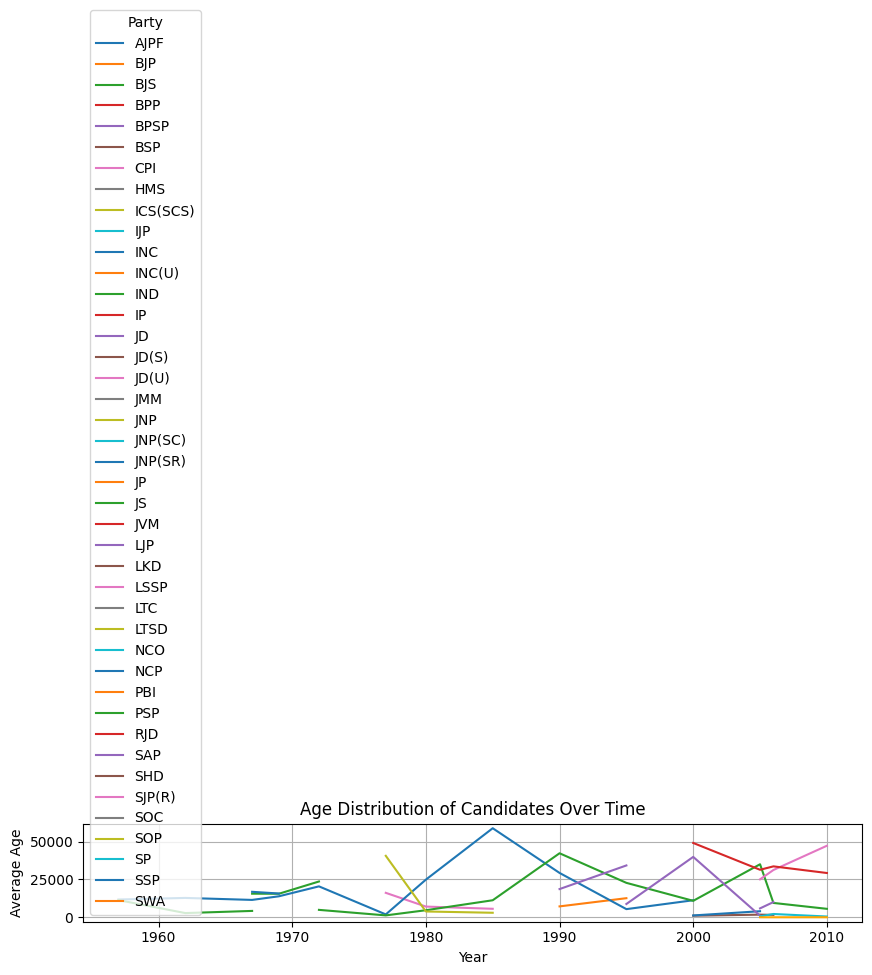

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "/Users/nithesh-pt7363/Work/IITMBS/TDS/Project-1/assembly_dataset2_corrected - assembly_dataset2.csv.csv"
df = pd.read_csv(url)

state_name = "Bihar"
constituency_name = "AMARPUR"
df_filtered = df[(df['ST_NAME'] == state_name) & (df['AC_NAME'] == constituency_name)]

# Data Analysis and Visualization
# 1. Plot the trend of the margin of victory across parties over time
party_margin = df_filtered.groupby(['YEAR', 'PARTY'])['VOTES'].sum().unstack()
party_margin.plot(kind='line', figsize=(10, 6))
plt.title("Margin of Victory Across Parties Over Time")
plt.xlabel("Year")
plt.ylabel("Votes")
plt.legend(title="Party", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("margin_of_victory.png")

# 2. Plot the trend of age distribution of candidates over time
age_distribution = df_filtered.groupby('YEAR')['AGE'].mean()
age_distribution.plot(kind='line', figsize=(10, 6), color='orange')
plt.title("Age Distribution of Candidates Over Time")
plt.xlabel("Year")
plt.ylabel("Average Age")
plt.grid(True)
plt.tight_layout()
plt.savefig("age_distribution.png")

In [67]:
filtered_df = df[(df['ST_NAME'] == state_name) & (df['AC_NAME'] == constituency_name)]

# Group the data by "PARTY" and "YEAR" to calculate the total votes obtained by each party in each election year
party_year_grouped = filtered_df.groupby(['PARTY', 'YEAR']).sum()['VOTES'].reset_index()

# Calculate the total votes cast in each election year
total_votes_per_year = filtered_df.groupby('YEAR')['VOTES'].sum()

# Calculate the vote share for each party in each election year
party_year_grouped['VOTE_SHARE'] = party_year_grouped.apply(lambda row: row['VOTES'] / total_votes_per_year[row['YEAR']], axis=1)

# Calculate the difference in vote share for each party between consecutive elections
party_year_grouped['VOTE_SHARE_DIFF'] = party_year_grouped.groupby('PARTY')['VOTE_SHARE'].diff()

# Find the party with the maximum increase in vote share between consecutive elections
most_improved_party = party_year_grouped.loc[party_year_grouped['VOTE_SHARE_DIFF'].idxmax()]

# Get the increase in vote share for the most improved party
increase_in_vote_share = most_improved_party['VOTE_SHARE_DIFF']

# Print the result
print("The increase in vote share for the party that showed the most significant improvement from one election to the next consecutive one is:", increase_in_vote_share)


The increase in vote share for the party that showed the most significant improvement from one election to the next consecutive one is: 0.3282282212687395


In [78]:
state_name = "Bihar"
constituency_name = "AMARPUR"
filtered_df = df[(df['ST_NAME'] == state_name) & (df['AC_NAME'] == constituency_name)]

# Group the data by "PARTY" and "YEAR" to calculate the total votes obtained by each party in each election year
party_year_grouped = filtered_df.groupby(['PARTY', 'YEAR']).sum()['VOTES'].reset_index()

# Calculate the total votes cast in each election year
total_votes_per_year = filtered_df.groupby('YEAR')['VOTES'].sum()

# Calculate the vote share for each party in each election year
party_year_grouped['VOTE_SHARE'] = party_year_grouped.apply(lambda row: row['VOTES'] / total_votes_per_year[row['YEAR']], axis=1)

# Calculate the difference in vote share for each party between consecutive elections
party_year_grouped['VOTE_SHARE_DIFF'] = party_year_grouped.groupby('PARTY')['VOTE_SHARE'].diff()

# Exclude parties that did not contest in the subsequent consecutive election
party_year_grouped = party_year_grouped.dropna(subset=['VOTE_SHARE_DIFF'])

# Find the party with the maximum increase in vote share between consecutive elections
most_improved_party = party_year_grouped.loc[party_year_grouped['VOTE_SHARE_DIFF'].idxmax()]

# Get the year with the most significant increase
year_most_improved = most_improved_party['YEAR']

# Print the result
print("The year with the most significant increase in vote share for a party from one election to the next consecutive one is:", year_most_improved)

The year with the most significant increase in vote share for a party from one election to the next consecutive one is: 1985


In [83]:
state_name = "Bihar"
constituency_name = "AMARPUR"
filtered_df = df[(df['ST_NAME'] == state_name) & (df['AC_NAME'] == constituency_name)]

# Group the data by year to calculate the total votes cast in each election
total_votes_per_year = filtered_df.groupby('YEAR')['VOTES'].sum()

# Calculate the threshold for losing the deposit (1/6th of the total votes cast)
deposit_threshold = total_votes_per_year / 6

# Count the number of candidates who lost their deposit
candidates_lost_deposit = (filtered_df['VOTES'] < deposit_threshold[filtered_df['YEAR']]).sum()

# Print the result
print("The number of candidates across the years who lost their deposit is:", candidates_lost_deposit)

ValueError: Can only compare identically-labeled Series objects

In [85]:
state_name = "Bihar"
constituency_name = "AMARPUR"
filtered_df = df[(df['ST_NAME'] == state_name) & (df['AC_NAME'] == constituency_name)]

# Group the data by year to calculate the total votes cast in each election
total_votes_per_year = filtered_df.groupby('YEAR')['VOTES'].sum()

# Calculate the threshold for losing the deposit (1/6th of the total votes cast)
deposit_threshold = total_votes_per_year / 6

# Count the number of candidates who lost their deposit
candidates_lost_deposit = (filtered_df['VOTES'] < deposit_threshold.reindex(filtered_df['YEAR']).values).sum()

# Print the result
print("The number of candidates across the years who lost their deposit is:", candidates_lost_deposit)

The number of candidates across the years who lost their deposit is: 141


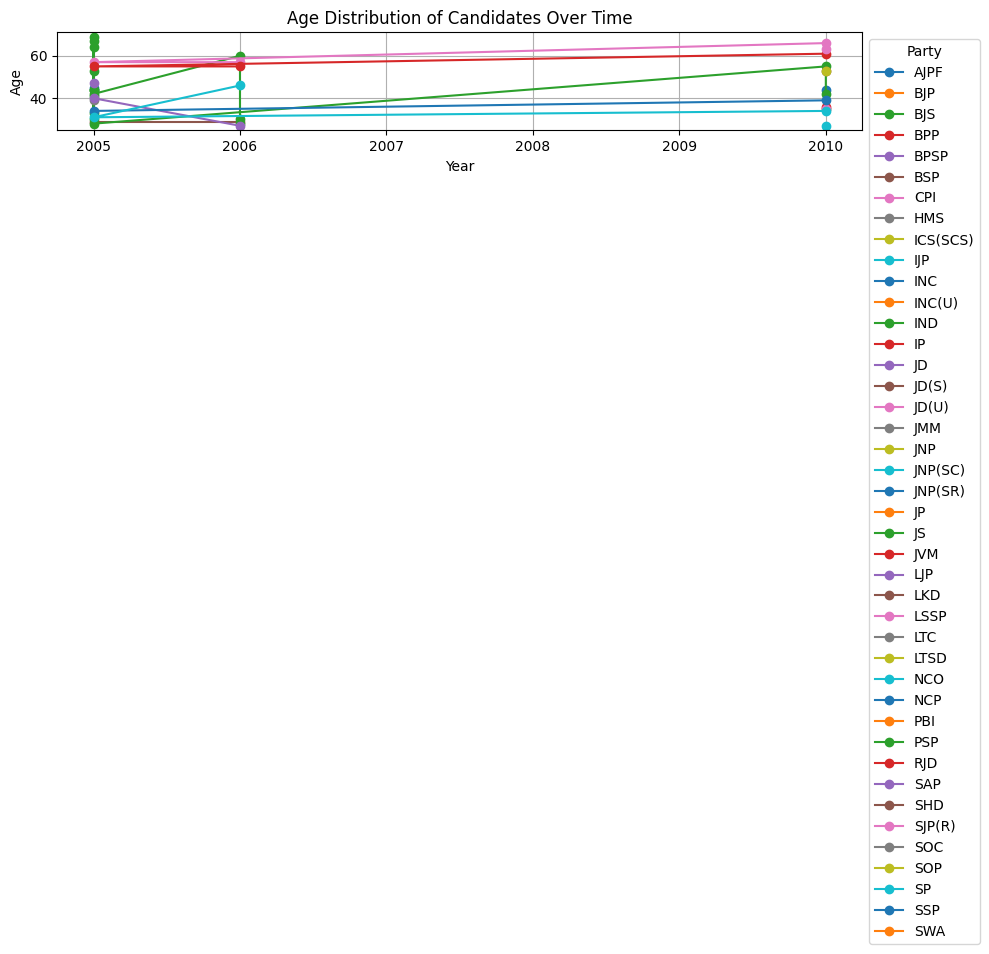

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# url = "https://drive.google.com/uc?id=1RzQASU7v6Pb4ciMIVsSUTKbAqI7h5xGe"
# df = pd.read_csv(url)

# Filter the data based on specified StateName (ST_NAME) and constituency name (AC_NAME)
state_name = "Bihar"
constituency_name = "AMARPUR"
df_filtered = df[(df['ST_NAME'] == state_name) & (df['AC_NAME'] == constituency_name)]

# Data Analysis and Visualization
# Plot the trend of age distribution of all candidates over time
plt.figure(figsize=(10, 6))
for party, data in df_filtered.groupby('PARTY'):
    plt.plot(data['YEAR'], data['AGE'], label=party, marker='o', linestyle='-')
plt.title("Age Distribution of Candidates Over Time")
plt.xlabel("Year")
plt.ylabel("Age")
plt.legend(title="Party", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("age_distribution_all_candidates.png")

# Analysis and Conclusion
# Analyze the trend observed in the chart and provide insights
# For example, analyze whether there is any noticeable change in the age distribution of candidates over time

# Submission
# Organize the chart into one folder within the Google Drive and share the link in the submission


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# url = "https://drive.google.com/uc?id=1RzQASU7v6Pb4ciMIVsSUTKbAqI7h5xGe"
# df = pd.read_csv(url)

# Filter the data based on specified StateName (ST_NAME) and constituency name (AC_NAME)
state_name = "Bihar"
constituency_name = "AMARPUR"
df_filtered = df[(df['ST_NAME'] == state_name) & (df['AC_NAME'] == constituency_name)]

# Data Analysis and Visualization
# Plot the trend of age distribution of all candidates over time using a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='YEAR', y='AGE', hue='PARTY', data=df_filtered, palette='Set2', split=True, inner="quartile")
plt.title("Age Distribution of Candidates Over Time")
plt.xlabel("Year")
plt.ylabel("Age")
plt.legend(title="Party", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("age_distribution_all_candidates_violin.png")

# Analysis and Conclusion
# Analyze the trend observed in the chart and provide insights
# For example, analyze whether there is any noticeable change in the age distribution of candidates over time

# Submission
# Organize the chart into one folder within the Google Drive and share the link in the submission


ValueError: There must be exactly two hue levels to use `split`.'

<Figure size 1000x600 with 0 Axes>

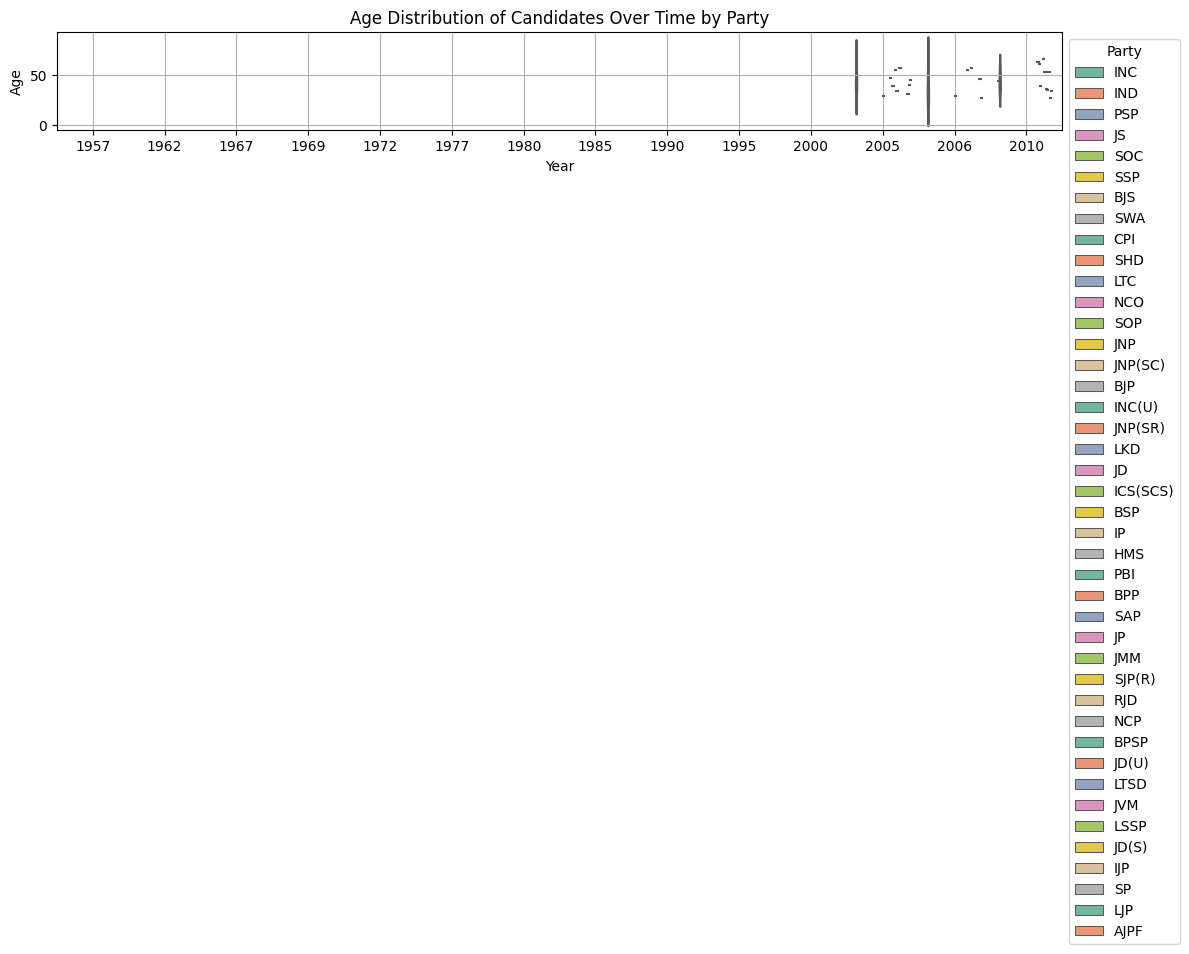

In [6]:
# Filter the data based on specified StateName (ST_NAME) and constituency name (AC_NAME)
state_name = "Bihar"
constituency_name = "AMARPUR"
df_filtered = df[(df['ST_NAME'] == state_name) & (df['AC_NAME'] == constituency_name)]

# Data Analysis and Visualization
# Plot the trend of age distribution of all candidates over time using violin plots for each party
plt.figure(figsize=(12, 6))
sns.violinplot(x='YEAR', y='AGE', hue='PARTY', data=df_filtered, palette='Set2', inner="quartile")
plt.title("Age Distribution of Candidates Over Time by Party")
plt.xlabel("Year")
plt.ylabel("Age")
plt.legend(title="Party", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("age_distribution_all_candidates_by_party_violin.png")

# Analysis and Conclusion
# Analyze the trend observed in the chart and provide insights
# For example, analyze whether there is any noticeable change in the age distribution of candidates for different parties over time

# Submission
# Organize the chart into one folder within the Google Drive and share the link in the submission